# Utils

In [1]:
import torch
from torch import autograd
from torch_geometric.data import Data
from torch_geometric.nn import DimeNet
# from torch_geometric.nn import DimeNetPlusPlus
from tqdm import tqdm
import torch_geometric
from torch_geometric.loader import DataLoader

C:\Users\sudka\anaconda3\envs\aquas\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(torch_geometric.__version__)

2.1.0


In [3]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
from torch_geometric.datasets import QM9

In [5]:
print(torch.__version__)

1.11.0


In [6]:
# sample dataset QM9

path = "open catalyst"
dataset_qm9 = QM9(root=path)
target = 9

for data in dataset_qm9:
    print(data.x)
    print(data.edge_index)
    print(data.edge_attr)
    print(data.y)
    print(data.pos)
    print(data.idx)
    print(data.z)
    break

tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]])
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])
tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]])
tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,  3.0000e-04],
        [-5.4080e-01,  1.4475e+00, -8.

# Datasets

In [7]:
df1 = pd.read_csv("water_coordinates")
df2 = pd.read_csv("water_zmatrix")
df1.head()

,O_x,O_y,O_z,H1_x,H1_y,H1_z,H2_x,H2_y,H2_z,energy
0,0.008938,0.0,0.435510,-0.797301,0.0,-0.597660,0.655452,0.0,-0.487586,-76.273156
1,0.007150,0.0,0.435510,-0.783116,0.0,-0.586653,0.669637,0.0,-0.498593,-76.273893
2,-0.023238,0.0,0.438126,-0.572714,0.0,-0.420285,0.941522,0.0,-0.706480,-76.250688
3,0.028601,0.0,0.435510,-0.953335,0.0,-0.718743,0.499417,0.0,-0.366503,-76.245592
4,0.014300,0.0,0.436818,-0.855226,0.0,-0.641063,0.628268,0.0,-0.464943,-76.264198


In [37]:
def x2e(x):
    """convert xyz coordinates to inverse pairwise distance"""
    r2 = np.sum((x - x[:, np.newaxis, :]) ** 2, axis=-1)
    e = np.where(r2 != 0, 1 / r2, 0.0)
    return e

In [38]:
angle = df2["θ(at2,at0,at1)"]
# angle = torch.tensor(angle, dtype=torch.float)
# edge_index = df2.iloc[:,:2]
# edge_index.head()
angle = angle.to_numpy()
size = angle.size
print(size)
# zeros = np.zeros(size, dtype=float)
# edge_arr = np.vstack((zeros,angle,zeros))
# edge_lst = []
# edge_atr = edge_atr.reshape(-1,3)
# for i in range(size):
#     x = edge_arr[:,i]
#     edge_lst.append(x)
    
# for i in range(len(angle)):
#     edge[0][0] = 1.
#     edge[0][1] = angle[i]
#     edge[1][0] = 1.
#     edge[1][1] = angle[i]
#     edge_lst.append(edge)
# edge_atr = np.asarray(edge_lst)
# edge_atr = torch.tensor(edge_lst)
# edge_atr.size()

edge_atr = torch.tensor([8,1,1])

36003


In [10]:
# normalisation of data

# scaler1 = MinMaxScaler()
# scaler2 = MinMaxScaler()
# nodes = df1.drop(columns=["energy"])
# nodes = scaler1.fit_transform(nodes)
# nodes = torch.tensor(nodes, dtype=torch.float)
# nodes = torch.reshape(nodes, (-1,3,3))

In [42]:
# non-noralised data
nodes = df1.drop(columns=["energy"])
nodes = nodes.to_numpy()
nodes = torch.tensor(nodes, dtype=torch.float)
nodes = torch.reshape(nodes, (-1,3,3))

In [43]:
#normalised targets

# y = df1["energy"]
# y = y.to_numpy().reshape(-1,1)
# y = scaler2.fit_transform(y)
# y = torch.tensor(y, dtype=torch.float).reshape((-1,1,1))

In [44]:
#non-normalised targets

y = df1["energy"]
y = y.to_numpy()
y = torch.tensor(y, dtype=torch.float).reshape((-1,1))

In [45]:
# edge_index = torch.tensor([[1.,1.,0.],[1.,0.,1.]],dtype=torch.float)
# edge_index = torch.LongTensor([[1,1,0],[1,0,1]])
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]])

In [46]:
dataset = []
for i in range(size):
    data = Data(pos=nodes[i], edge_index=edge_index, edge_attr=edge_atr, y=y[i])
    dataset.append(data)

len(dataset)

36003

In [47]:
sample = dataset[0]
sample

Data(edge_index=[2, 4], edge_attr=[3], y=[1], pos=[3, 3])

In [48]:
random.shuffle(dataset)

In [49]:
data_tr = dataset[:math.floor(0.7*size)]
data_va = dataset[math.floor(0.7*size):math.floor(0.9*size)]
data_te = dataset[math.floor(0.9*size):]

# Data Loaders

In [56]:
loader_train = DataLoader(data_tr, batch_size=32, shuffle=True)
loader_val = DataLoader(data_va, batch_size=32, shuffle=True)
loader_test = DataLoader(data_te, batch_size=32, shuffle=True)

# Dimenet Model

In [19]:
model = DimeNet(hidden_channels=128, out_channels=1, num_blocks=6, num_bilinear=8, num_spherical=7, num_radial=6)

In [67]:
model.reset_parameters()

# Loss Function

In [58]:
def loss(y_hat,y):
    loss = torch.nn.MSELoss(reduction="mean")
    output = loss(y_hat, y)
    return output

# Optimizer

In [65]:
optim1 = torch.optim.Adam(model.parameters(), lr=1e-4)
optim2 = torch.optim.RAdam(model.parameters(), lr=1e-4)

# Training Loop

In [68]:
def train_on_batch(data, model, opt, loss):
    y_hat = model.forward(z=data.edge_attr, pos=data.pos, batch=data.batch)
    loss_mean = loss(y_hat, data.y)
    loss_mean.backward()
    opt.step()  
    return loss_mean

In [127]:
with autograd.detect_anomaly():
    epochs = 5
    train_loss = []
    for epoch in range(epochs):
        for data in tqdm(loader_train):
            print(data)
            loss_mean = train_on_batch(data,model,optim1,loss)
        print(loss_mean)
        train_loss.append(loss_mean.detach().numpy())

C:\Users\sudka\AppData\Local\Temp\ipykernel_18132\1701331734.py:1: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with autograd.detect_anomaly():
  0%|                                                                                          | 0/788 [00:00<?, ?it/s]

DataBatch(edge_index=[2, 128], edge_attr=[96], y=[32], pos=[96, 3], batch=[96], ptr=[33])


C:\Users\sudka\anaconda3\envs\aquas\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\sudka\anaconda3\envs\aquas\lib\site-packages\torch\autograd\__init__.py:173: UserWarning: Error detected in MseLossBackward0. Traceback of forward call that caused the error:
  File "C:\Users\sudka\anaconda3\envs\aquas\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\sudka\anaconda3\envs\aquas\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\sudka\anaconda3\envs\aquas\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\sudka\anaconda3\envs\aquas\lib\site-packages\traitlets\conf

RuntimeError: Function 'MseLossBackward0' returned nan values in its 0th output.

In [ ]:
plt.plot(train_loss)

# Sample code with 3 data points

In [118]:
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]])
edge_atr = torch.tensor([8,1,1])

# pos = np.asarray([[ 0.0089,  0.0000,  0.4355,
#          -0.7973,  0.0000, -0.5977,
#           0.6555,  0.0000, -0.4876],

#         [ 0.0072,  0.0000,  0.4355,
#          -0.7831,  0.0000, -0.5867,
#           0.6696,  0.0000, -0.4986],

#         [-0.0232,  0.0000,  0.4381,
#          -0.5727,  0.0000, -0.4203,
#           0.9415,  0.0000, -0.7065]])

# target = np.asarray([-76.273156,-76.273893,-76.250688])

#non-normalised inputs
# pos = torch.tensor(pos, dtype=torch.float)
# pos = torch.reshape(pos, (-1,3,3))

# target = torch.tensor(target, dtype=torch.float).reshape((-1,1))

#normalised inputs

# scaler1 = MinMaxScaler()
# scaler2 = MinMaxScaler()
# pos = scaler1.fit_transform(pos)
# pos = torch.tensor(pos, dtype=torch.float)
# pos = torch.reshape(pos, (-1,3,3))

# target = scaler2.fit_transform(target.reshape(-1,1))
# target = torch.tensor(target, dtype=torch.float)

In [119]:
pos = torch.tensor([[[ 0.0089,  0.0000,  0.4355],
         [-0.7973,  0.0000, -0.5977],
         [ 0.6555,  0.0000, -0.4876]],

        [[ 0.0072,  0.0000,  0.4355],
         [-0.7831,  0.0000, -0.5867],
         [ 0.6696,  0.0000, -0.4986]],

        [[-0.0232,  0.0000,  0.4381],
         [-0.5727,  0.0000, -0.4203],
         [ 0.9415,  0.0000, -0.7065]]])

target = torch.tensor([[-76.2732],
        [-76.2739],
        [-76.2507]])

In [120]:
model_2 = DimeNet(hidden_channels=128, out_channels=1, num_blocks=6, num_bilinear=8, num_spherical=7, num_radial=6)

In [121]:
model_2.reset_parameters()

In [124]:
dataset = []
for i in range(3):
    data = Data(pos=pos[i], edge_index=edge_index, edge_attr=edge_atr, y=target[i])
    dataset.append(data)
    
def loss(y_hat,y):
    loss = torch.nn.MSELoss(reduction="mean")
    output = loss(y_hat, y)
    return output

opt = torch.optim.Adam(model_2.parameters(), lr=1e-5)

def train_on_batch(data, model, opt, loss):
    y_hat = model.forward(z=data.edge_attr, pos=data.pos)
    loss_mean = loss(y_hat, data.y)
    loss_mean.backward()
    opt.step()  
    return loss_mean

In [125]:
with autograd.detect_anomaly():
    epochs = 10
    train_loss = []
    for epoch in range(epochs):
        for data in tqdm(dataset):
            loss_mean = train_on_batch(data,model_2,opt,loss)
        print(loss_mean)
        train_loss.append(loss_mean.detach().numpy())

C:\Users\sudka\AppData\Local\Temp\ipykernel_18132\3595110761.py:1: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with autograd.detect_anomaly():
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


tensor(5809.4023, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


tensor(5798.9844, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


tensor(5782.9448, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.15it/s]


tensor(5758.5488, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.15s/it]


tensor(5721.7905, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]


tensor(5667.1230, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.01s/it]


tensor(5586.7251, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


tensor(5469.0142, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.02s/it]


tensor(5298.3540, grad_fn=<MseLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]

tensor(5052.3711, grad_fn=<MseLossBackward0>)


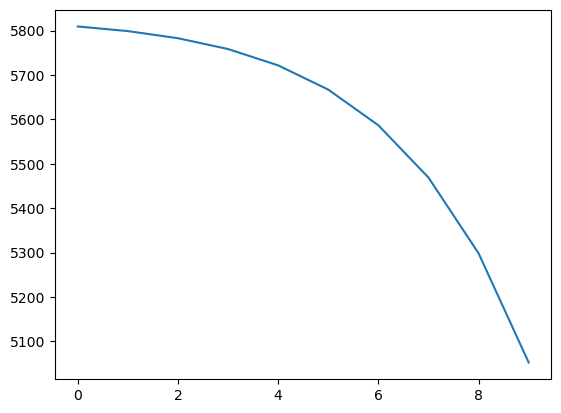

In [126]:
plt.plot(train_loss)